# 간단한 OpenCV 필터 적용

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def apply_sepia(img):
    """
    이미지에 세피아 필터를 적용
    
    Args:
        img: RGB 이미지
        
    Returns:
        세피아 필터가 적용된 이미지
    """
    sepia_filter = np.array([[0.272, 0.534, 0.131],
                             [0.349, 0.686, 0.168],
                             [0.393, 0.769, 0.189]])
    return cv2.transform(img, sepia_filter)

def apply_grayscale(img):
    """
    이미지를 그레이스케일로 변환
    
    Args:
        img: RGB 이미지
        
    Returns:
        그레이스케일 이미지 (1채널)
    """
    if len(img.shape) == 3:
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    else:
        return img

def apply_vintage(img):
    """
    이미지에 강한 빈티지 필터를 적용합니다.
    
    Args:
        img: RGB 이미지
        
    Returns:
        빈티지 필터가 적용된 이미지
    """
    # 1. HSV 변환
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    # 2. 채도 대폭 감소 (더 흐린 색상)
    img_hsv[:, :, 1] = img_hsv[:, :, 1] * 0.3
    
    # 3. 명도 조정 (어둡게)
    img_hsv[:, :, 2] = img_hsv[:, :, 2] * 0.8
    
    # 4. 색조 약간 조정 (따뜻한 톤)
    img_hsv[:, :, 0] = np.clip(img_hsv[:, :, 0] * 1.1, 0, 179)
    
    # 5. RGB로 변환
    img_vintage = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
    
    # 6. 세피아 톤 추가
    sepia_filter = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    img_vintage = cv2.transform(img_vintage, sepia_filter)
    
    # 7. 대비 감소 (흐릿한 느낌)
    img_vintage = cv2.convertScaleAbs(img_vintage, alpha=0.9, beta=10)
    
    # 8. 노이즈 추가 (오래된 사진 느낌)
    noise = np.random.normal(0, 5, img_vintage.shape).astype(np.uint8)
    img_vintage = cv2.add(img_vintage, noise)
    
    # 9. 약간의 블러 효과
    img_vintage = cv2.GaussianBlur(img_vintage, (3, 3), 0.5)
    
    
    return img_vintage

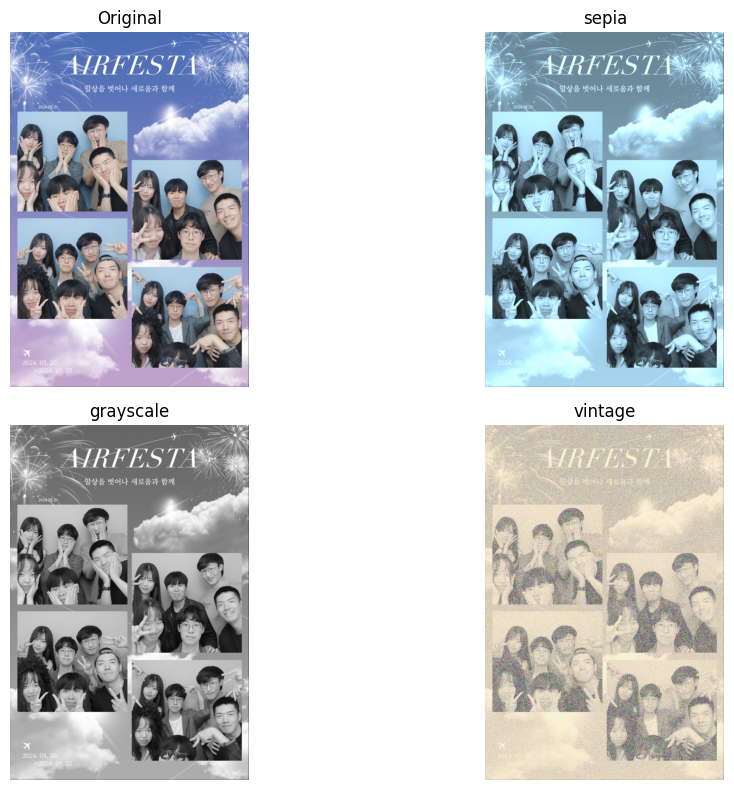

In [ ]:
# 이미지 로드 (파일이 없다면 샘플 이미지 생성)
try:
    img = cv2.imread('input.jpg')
    if img is None:
        # 샘플 이미지 생성
        img = np.random.randint(0, 255, (300, 400, 3), dtype=np.uint8)
        print("input.jpg 파일을 찾을 수 없어 샘플 이미지를 생성했습니다.")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except:
    # 샘플 이미지 생성
    img = np.random.randint(0, 255, (300, 400, 3), dtype=np.uint8)
    print("input.jpg 파일을 찾을 수 없어 샘플 이미지를 생성했습니다.")

# 필터 적용
img_sepia = apply_sepia(img)
img_grayscale = apply_grayscale(img)
img_vintage = apply_vintage(img)

# 결과 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(img)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_sepia)
axes[0, 1].set_title('sepia')
axes[0, 1].axis('off')

axes[1, 0].imshow(img_grayscale, cmap='gray')
axes[1, 0].set_title('grayscale')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_vintage)
axes[1, 1].set_title('vintage')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# 이미지를 인풋으로 받아 감정 분류

분석할 이미지: ['input.jpg']
분석 중: input.jpg


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 26.81it/s]


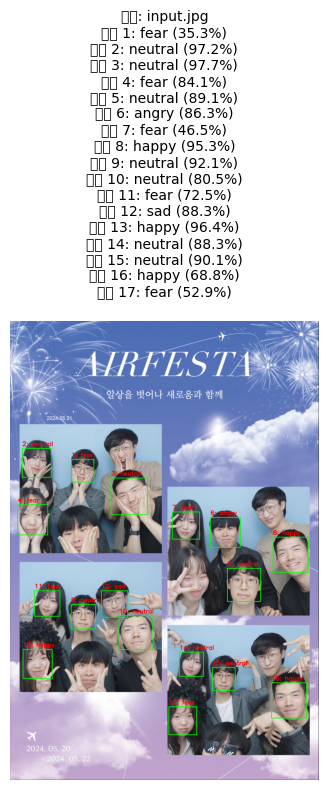


감정 분석 결과 요약

📸 input.jpg:
  👤 얼굴 1: fear (35.3%)
  👤 얼굴 2: neutral (97.2%)
  👤 얼굴 3: neutral (97.7%)
  👤 얼굴 4: fear (84.1%)
  👤 얼굴 5: neutral (89.1%)
  👤 얼굴 6: angry (86.3%)
  👤 얼굴 7: fear (46.5%)
  👤 얼굴 8: happy (95.3%)
  👤 얼굴 9: neutral (92.1%)
  👤 얼굴 10: neutral (80.5%)
  👤 얼굴 11: fear (72.5%)
  👤 얼굴 12: sad (88.3%)
  👤 얼굴 13: happy (96.4%)
  👤 얼굴 14: neutral (88.3%)
  👤 얼굴 15: neutral (90.1%)
  👤 얼굴 16: happy (68.8%)
  👤 얼굴 17: fear (52.9%)

📊 전체 통계:
  총 감지된 얼굴 수: 17
  감정 분포:
    angry: 1명 (5.9%)
    fear: 5명 (29.4%)
    happy: 3명 (17.6%)
    sad: 1명 (5.9%)
    neutral: 7명 (41.2%)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

class EmotionAnalyzer:
    def __init__(self):
        """
        감정 분석기 초기화
        """
        self.emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
        self.emotion_korean = {
            'angry': '화남',
            'disgust': '역겨움',
            'fear': '두려움',
            'happy': '행복',
            'sad': '슬픔',
            'surprise': '놀람',
            'neutral': '무표정'
        }
    
    def analyze_emotion(self, image_path):
        """
        단일 이미지에서 감정을 분석합니다.
        Args:
            image_path: 이미지 파일 경로
        Returns:
            감정 분석 결과 딕셔너리 (bounding box 포함)
        """
        try:
            # DeepFace를 사용한 감정 분석
            result = DeepFace.analyze(image_path, 
                                    actions=['emotion'],
                                    enforce_detection=False)
            # 결과 처리
            if isinstance(result, list):
                # 여러 얼굴이 감지된 경우
                emotions = []
                for face_result in result:
                    emotion = face_result['dominant_emotion']
                    confidence = face_result['emotion'][emotion]
                    # bounding box 정보 추가 (x, y, w, h)
                    region = face_result.get('region', None)
                    if region:
                        x, y, w, h = region['x'], region['y'], region['w'], region['h']
                    else:
                        x, y, w, h = None, None, None, None
                    emotions.append({
                        'emotion': emotion,
                        'confidence': confidence,
                        'box': (x, y, w, h)
                    })
                return emotions
            else:
                # 단일 얼굴이 감지된 경우
                emotion = result['dominant_emotion']
                confidence = result['emotion'][emotion]
                region = result.get('region', None)
                if region:
                    x, y, w, h = region['x'], region['y'], region['w'], region['h']
                else:
                    x, y, w, h = None, None, None, None
                return [{
                    'emotion': emotion,
                    'confidence': confidence,
                    'box': (x, y, w, h)
                }]
        except Exception as e:
            print(f"감정 분석 중 오류 발생: {e}")
            return []
    
    def analyze_multiple_images(self, image_paths):
        """
        여러 이미지에서 감정을 분석합니다.
        
        Args:
            image_paths: 이미지 파일 경로 리스트
            
        Returns:
            각 이미지별 감정 분석 결과
        """
        results = {}
        
        for image_path in image_paths:
            if os.path.exists(image_path):
                print(f"분석 중: {image_path}")
                emotions = self.analyze_emotion(image_path)
                results[image_path] = emotions
            else:
                print(f"파일을 찾을 수 없습니다: {image_path}")
                results[image_path] = []
        
        return results
    
    def visualize_results(self, results):
        """
        감정 분석 결과를 시각화합니다.
        Args:
            results: 감정 분석 결과 딕셔너리
        """
        if not results:
            print("시각화할 결과가 없습니다.")
            return
        
        # 결과 개수에 따라 서브플롯 크기 결정
        n_images = len(results)
        # 각 이미지마다 2개의 서브플롯 (이미지 + 감정 리스트)
        cols = 2  # 항상 2열 (이미지 + 감정 리스트)
        rows = n_images
        
        # 이미지 크기를 더 크게 설정
        fig, axes = plt.subplots(rows, cols, figsize=(20, 8*rows))
        if n_images == 1:
            axes = axes.reshape(1, -1)
        
        # 서브플롯 간격 조정
        plt.subplots_adjust(wspace=0.1)  # 서브플롯 간 가로 간격 줄이기
        
        for idx, (image_path, emotions) in enumerate(results.items()):
            if idx >= rows:
                break
            
            # 왼쪽 서브플롯: 이미지 표시
            img = cv2.imread(image_path)
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                # 얼굴 번호와 감정명 표시
                if emotions:
                    for i, emotion_data in enumerate(emotions):
                        box = emotion_data.get('box', (None, None, None, None))
                        x, y, w, h = box
                        if None not in box:
                            # 사각형 그리기
                            cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)
                            # 번호+감정명 라벨 (바운딩 박스 위에 표시)
                            label = f"{i+1}: {emotion_data['emotion']}"
                            # 라벨을 얼굴 사각형 위쪽에 배치
                            label_x = x
                            label_y = y - 10  # 사각형 위쪽에서 10픽셀 떨어진 위치
                            cv2.putText(img_rgb, label, (label_x, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
                
                axes[idx, 0].imshow(img_rgb)
                axes[idx, 0].axis('off')
            else:
                axes[idx, 0].text(0.5, 0.5, f"이미지를 로드할 수 없습니다:\n{os.path.basename(image_path)}", 
                                 ha='center', va='center', transform=axes[idx, 0].transAxes)
                axes[idx, 0].axis('off')
            
            # 오른쪽 서브플롯: 감정 리스트 표시
            axes[idx, 1].axis('off')
            if emotions:
                # 감정 리스트를 텍스트로 표시
                emotion_text = f"result :\n\n"
                for i, emotion_data in enumerate(emotions):
                    emotion_text += f"face {i+1}: {emotion_data['emotion']} ({emotion_data['confidence']:.1f}%)\n"
                
                axes[idx, 1].text(0.1, 0.9, emotion_text, transform=axes[idx, 1].transAxes, 
                                 fontsize=12, va='top', 
                                 bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))
            else:
                axes[idx, 1].text(0.5, 0.5, "얼굴을 감지할 수 없습니다.", 
                                 ha='center', va='center', transform=axes[idx, 1].transAxes,
                                 fontsize=12, bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
    
    def print_summary(self, results):
        """
        감정 분석 결과 요약을 출력합니다.
        
        Args:
            results: 감정 분석 결과 딕셔너리
        """
        print("\n" + "="*50)
        print("감정 분석 결과 요약")
        print("="*50)
        
        total_faces = 0
        emotion_counts = {emotion: 0 for emotion in self.emotions}
        
        for image_path, emotions in results.items():
            print(f"\n📸 {os.path.basename(image_path)}:")
            
            if emotions:
                for i, emotion_data in enumerate(emotions):
                    emotion = emotion_data['emotion']
                    confidence = emotion_data['confidence']
                    
                    print(f"  얼굴 {i+1}: {emotion} ({confidence:.1f}%)")
                    emotion_counts[emotion] += 1
                    total_faces += 1
            else:
                print("  ❌ 얼굴을 감지할 수 없습니다.")
        
        # 전체 통계
        print(f"\n📊 전체 통계:")
        print(f"  총 감지된 얼굴 수: {total_faces}")
        
        if total_faces > 0:
            print("  감정 분포:")
            for emotion in self.emotions:
                if emotion_counts[emotion] > 0:
                    percentage = (emotion_counts[emotion] / total_faces) * 100
                    print(f"    {emotion}: {emotion_counts[emotion]}명 ({percentage:.1f}%)")

def main():
    """
    메인 함수 - 예제 실행
    """
    analyzer = EmotionAnalyzer()
    
    # 테스트할 이미지 파일들 (실제 파일 경로로 변경하세요)
    test_images = [
        'input.jpg',  # 실제 이미지 파일 경로로 변경
        # 'person1.jpg',
        # 'person2.jpg',
        # 'group_photo.jpg'
    ]
    
    # 존재하는 파일만 필터링
    existing_images = [img for img in test_images if os.path.exists(img)]
    
    if not existing_images:
        print("분석할 이미지 파일이 없습니다.")
        print("테스트를 위해 샘플 이미지를 생성합니다...")
        
        # 샘플 이미지 생성
        sample_image = np.random.randint(0, 255, (300, 400, 3), dtype=np.uint8)
        cv2.imwrite('sample_face.jpg', sample_image)
        existing_images = ['sample_face.jpg']
    
    print(f"분석할 이미지: {existing_images}")
    
    # 감정 분석 실행
    results = analyzer.analyze_multiple_images(existing_images)
    
    # 결과 시각화
    analyzer.visualize_results(results)
    
    # 결과 요약 출력
    analyzer.print_summary(results)

if __name__ == "__main__":
    main() 